In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [2]:
import helper
from helper import preprocessor as pp

In [3]:
font = {'family' : 'sans-serif',
        'style' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = 15, 10

In [4]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [5]:
class_names = np.array(['Hate','Offensive','Neutral'])
data = pp.load_data('labeled_data.csv')
data['clean_tweet'] = data.tweet.apply(lambda doc: pp.clean_doc(doc))
data.head()


,labels,category,tweet,clean_tweet
0,2,neutral,!!! RT @mayasolovely: As a woman you shouldn't...,woman shouldnt complain cleaning house man alw...
1,1,offensive,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dats coldtyga dwn bad cuffin dat hoe place
2,1,offensive,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg ever fuck bitch start cry confused shit
3,1,offensive,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,look like tranny
4,1,offensive,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,shit hear might true might faker bitch told ya


In [6]:
# Split test and train data 
x_train, y_train= data.clean_tweet[:15000],data.labels[:15000]
x_val, y_val= data.clean_tweet[15000:20000],data.labels[15000:20000]
x_test, y_test = data.clean_tweet[20000:],data.labels[20000:]
# One hot vectors for class labels
y_train_onehot = to_categorical(y_train)
y_val_onehot = to_categorical(y_val)
y_test_onehot = to_categorical(y_test)

print('No. of tweets in the training set : {}'.format(len(y_train)))
print('No. of tweets in the training set : {}'.format(len(y_val)))
print('No. of tweets in the training set : {}'.format(len(y_test)))


No. of tweets in the training set : 15000
No. of tweets in the training set : 5000
No. of tweets in the training set : 4783


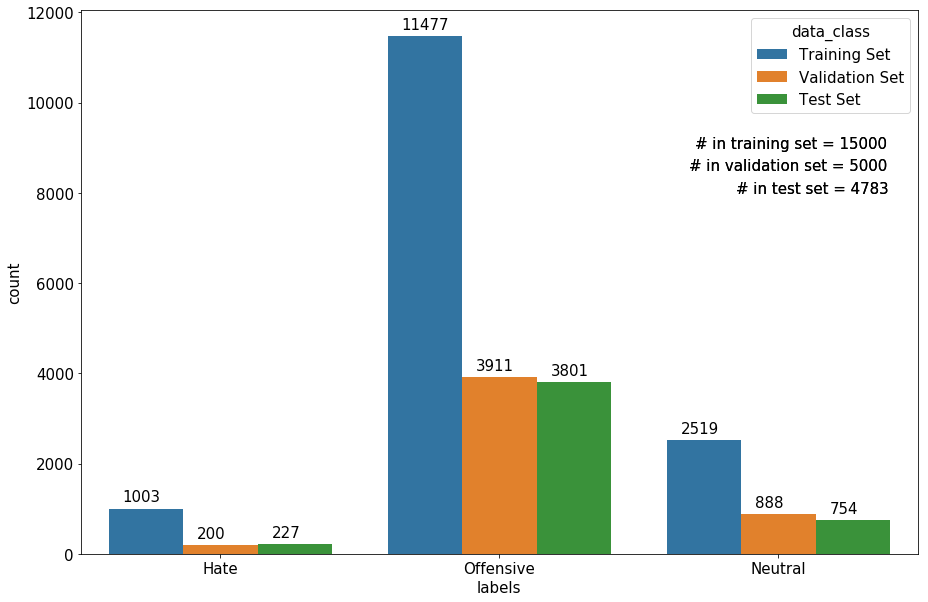

In [7]:
# Plot the histogram
df_train = pd.DataFrame(y_train[:-1]).reset_index(drop = True)
df_train['data_class'] = 'Training Set'
df_val = pd.DataFrame(y_val[:-1]).reset_index(drop = True)
df_val['data_class'] = 'Validation Set'
df_test = pd.DataFrame(y_test[:-1]).reset_index(drop = True)
df_test['data_class'] = 'Test Set'
df = pd.concat([df_train,df_val,df_test])

fig,ax1 = plt.subplots(1,1,figsize = (15,10))
sns.countplot (x = 'labels',hue = 'data_class',data = df, ax = ax1)
plt.xticks([0,1,2],class_names)
for p in ax1.patches:
        ax1.annotate('{}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+150))
        
        
for i in range(2):
    ax1.text(1.7, 9000,'# in training set = {}'.format(len(y_train)))
    ax1.text(1.68, 8500,'# in validation set = {}'.format(len(y_val)))
    ax1.text(1.85, 8000,'# in test set = {}'.format(len(y_test)))

In [8]:
# Initializer tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train.append(x_val))
vocab_size = len(tokenizer.word_index)+1
print('Total vocab size: {}'.format(vocab_size))

Total vocab size: 18498


In [9]:
max_length = max([len(tweet.split()) for tweet in x_train.append(x_val)])
print('Maximum word count in a tweet in training + validation set {}: '.format(max_length))

sequence_train = tokenizer.texts_to_sequences(x_train)
padded_train = pad_sequences(sequence_train, maxlen=max_length, padding='post') 

sequence_val = tokenizer.texts_to_sequences(x_val)
padded_val = pad_sequences(sequence_val, maxlen=max_length, padding='post') 

sequence_test = tokenizer.texts_to_sequences(x_test)
padded_test = pad_sequences(sequence_test, maxlen=max_length, padding='post') 

Maximum word count in a tweet in training + validation set 26: 


In [10]:
# Upload the GloVe embedding file and same the embedding matrix in a .pkl file.

embeddings_index = dict()
f = open('../wordemb/helper/glove/glove.6B.300d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coeff = np.asarray(values[1:], dtype = 'float32')
    embeddings_index[word] = coeff
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

embedding_matrix = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        
embed_df = pd.DataFrame(embedding_matrix)
embed_df.to_pickle("GloVe_matrix.pkl")

Loaded 400000 word vectors.


In [11]:
embedding_matrix = pd.read_pickle("Models/GloVe_matrix.pkl").values